In [92]:
import pandas as pd
import numpy as np

### PART (A): Data Preprocessing

In [4]:
# 1.Read the three csv files which contains the score of same students in term1 for each Subject
phy=pd.read_csv('physics.csv')
ds=pd.read_csv('ds.csv')
math=pd.read_csv('math.csv')

In [33]:
# 2.Remove the name and ethnicity column (to ensure confidentiality)
p = phy.drop(['Name','Ethinicity'],axis=1)
d = ds.drop(['Name','Ethinicity'],axis=1)
m = math.drop(['Name','Ethinicity'],axis=1)

In [30]:
bool_series = pd.isnull(p["Score"]) 
p[bool_series] 

,Score,Age,Subject,Sex,ID
16,NaN,18,Physics,M,17
65,NaN,21,Physics,M,66
90,NaN,19,Physics,M,91
106,NaN,21,Physics,M,107
108,NaN,19,Physics,M,109
121,NaN,18,Physics,M,122


In [37]:
# 3.Fill missing score data with zero
p["Score"].fillna("0", inplace = True) 
d["Score"].fillna("0", inplace = True) 
m["Score"].fillna("0", inplace = True) 


In [85]:
# 4.Merge two files
joined_df = pd.merge(p,d,on=['ID','Sex','Age'])
joined_df=pd.merge(joined_df,m,on=['ID','Sex','Age'])

In [86]:
# 5.Change Sex(M/F) Column to 1/2 for further analysis
joined_df['Sex'] = joined_df['Sex'].replace({'M': 1, 'F': 2})

In [87]:
joined_df

,Score_x,Age,Subject_x,Sex,ID,Score_y,Subject_y,Score,Subject
0,84.0,18,Physics,1,1,82.0,Data Structue,88.0,Maths
1,81.0,19,Physics,1,2,79.0,Data Structue,85.0,Maths
2,41.0,19,Physics,1,3,39.0,Data Structue,45.0,Maths
3,78.0,18,Physics,1,4,76.0,Data Structue,82.0,Maths
4,78.0,18,Physics,2,5,76.0,Data Structue,82.0,Maths
...,...,...,...,...,...,...,...,...,...
594,41.0,19,Physics,2,595,39.0,Data Structue,45.0,Maths
595,71.0,18,Physics,1,596,69.0,Data Structue,75.0,Maths
596,49.0,20,Physics,1,597,47.0,Data Structue,53.0,Maths
597,71.0,20,Physics,1,598,69.0,Data Structue,75.0,Maths


In [88]:
joined_df.rename(columns={'Score_x': 'Physics','Score_y':'Data Structure','Score':'Maths'}, inplace=True)
joined_df = joined_df.drop(['Subject_x','Subject_y','Subject'],axis=1)
joined_df

,Physics,Age,Sex,ID,Data Structure,Maths
0,84.0,18,1,1,82.0,88.0
1,81.0,19,1,2,79.0,85.0
2,41.0,19,1,3,39.0,45.0
3,78.0,18,1,4,76.0,82.0
4,78.0,18,2,5,76.0,82.0
...,...,...,...,...,...,...
594,41.0,19,2,595,39.0,45.0
595,71.0,18,1,596,69.0,75.0
596,49.0,20,1,597,47.0,53.0
597,71.0,20,1,598,69.0,75.0


In [89]:
# 6.Store the data in new file –ScoreFinal.csv
joined_df.to_csv('ScoreFinal.csv', index=False)

### PART (B): Data Visualization using various plots and boxplot

In [109]:
import seaborn as sn
import matplotlib.pyplot as plt

In [104]:
sales=pd.read_csv('sales_data.csv',encoding='latin-1')
sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


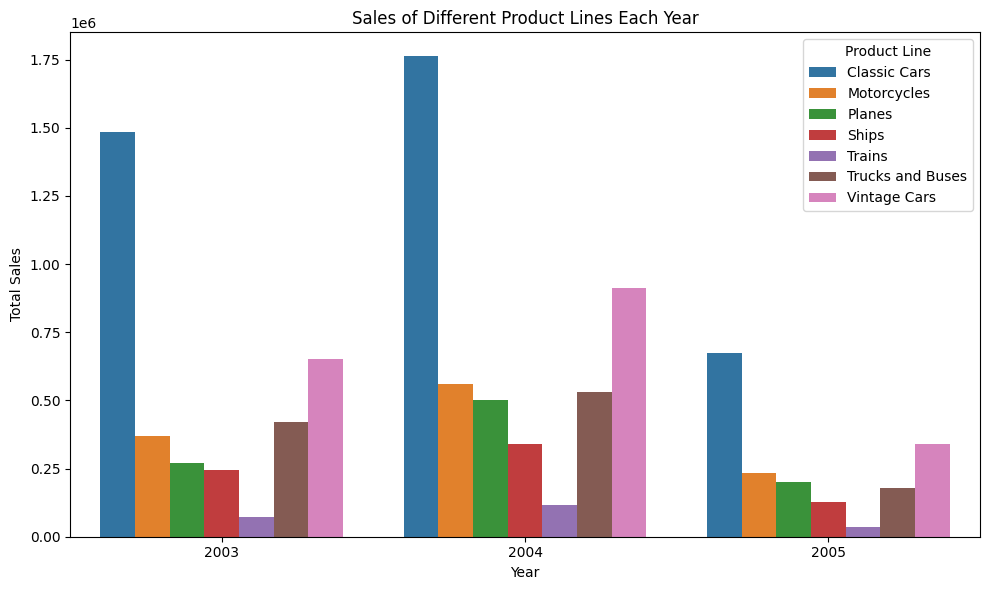

In [111]:
# 1. Use barchart to plot the sales of different product lines each year and present the analysis.
product_sales = sales.groupby(['YEAR_ID', 'PRODUCTLINE'])['SALES'].sum().reset_index()

plt.figure(figsize=(10, 6))
sn.barplot(data=product_sales, x='YEAR_ID', y='SALES', hue='PRODUCTLINE')
plt.title('Sales of Different Product Lines Each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()

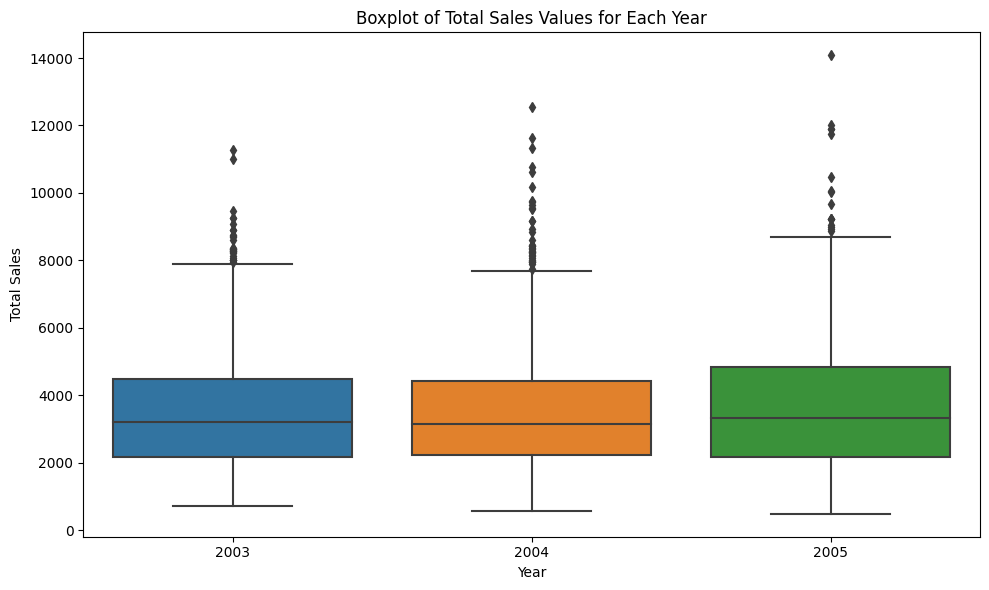

In [112]:
# 2.Plot boxplot for total sales values for each year and present the analysis.
plt.figure(figsize=(10, 6))
sn.boxplot(data=sales, x='YEAR_ID', y='SALES')
plt.title('Boxplot of Total Sales Values for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

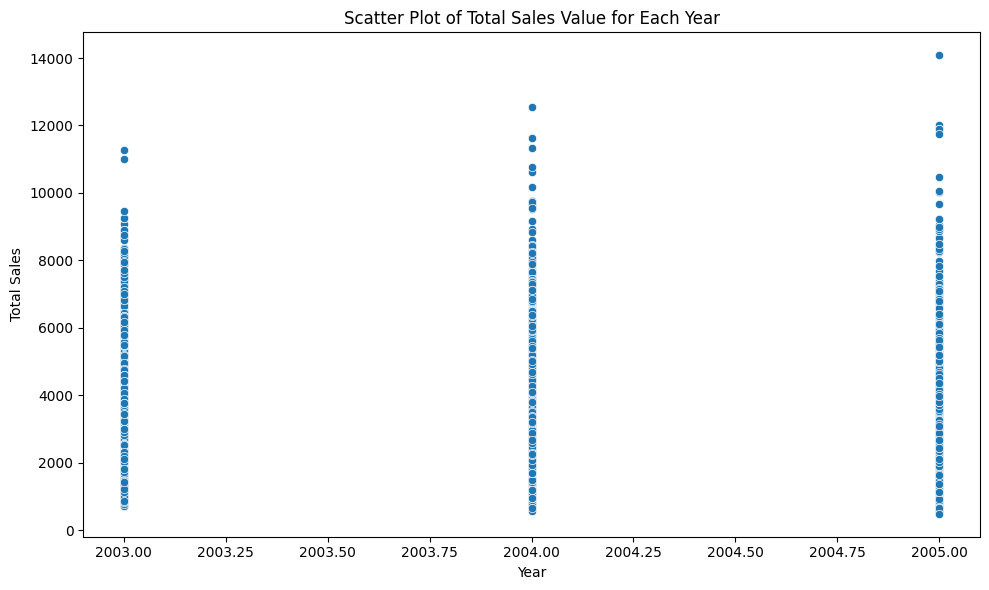

In [113]:
# 3.Plot scatter plot for total sales value for each year and present the analysis
plt.figure(figsize=(10, 6))
sn.scatterplot(data=sales, x='YEAR_ID', y='SALES')
plt.title('Scatter Plot of Total Sales Value for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


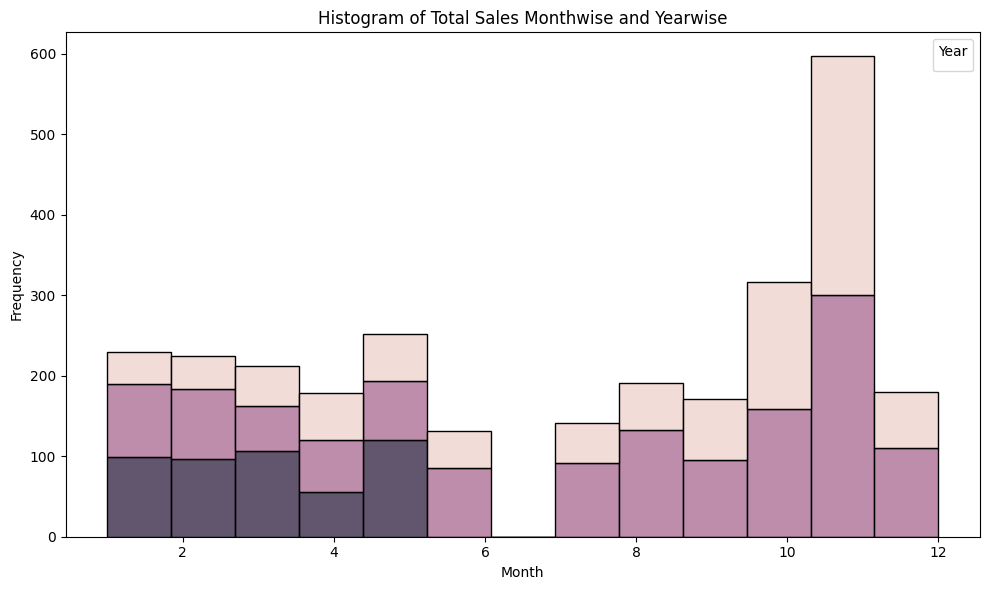

In [114]:
# 4.Generate histogram for total sales monthwise and yearwise
plt.figure(figsize=(10, 6))
sn.histplot(data=sales, x='MONTH_ID', hue='YEAR_ID', multiple='stack')
plt.title('Histogram of Total Sales Monthwise and Yearwise')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Year')
plt.tight_layout()
plt.show()